In [1]:
import logging
logging.getLogger().setLevel(logging.ERROR)
from pathlib import Path
from docembedder import DataModel
from docembedder.analysis2 import DocAnalysis
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_dir =  Path("..", "data")
output_dir = Path("..", "data", "results")
output_fp = output_dir / "tfidf.h5"


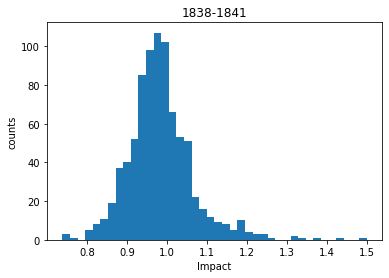

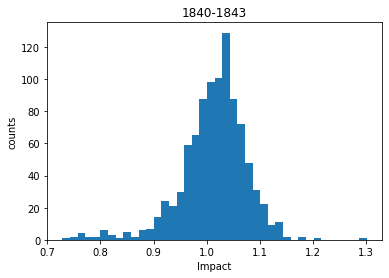

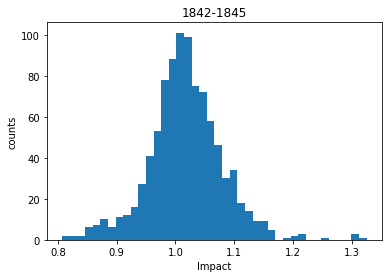

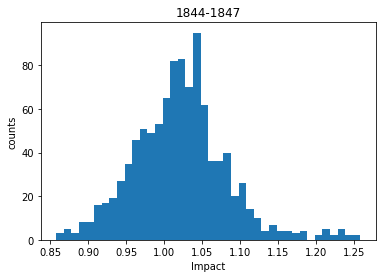

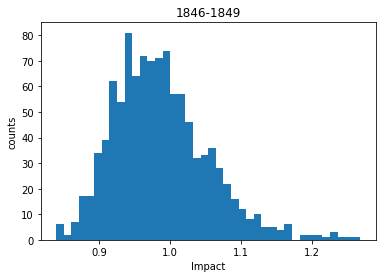

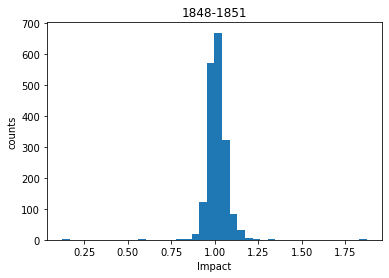

CPU times: user 774 ms, sys: 755 ms, total: 1.53 s
Wall time: 593 ms


In [3]:
%%time
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-bigram'):
        impact = analysis.patent_impacts(window, model)
        plt.title(window)
        plt.hist(impact, bins=40)
        plt.xlabel("Impact")
        plt.ylabel("counts")
        plt.show()

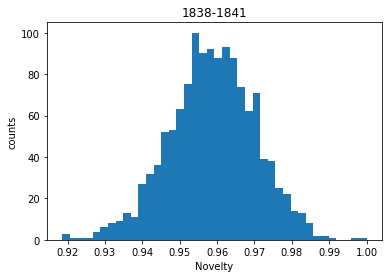

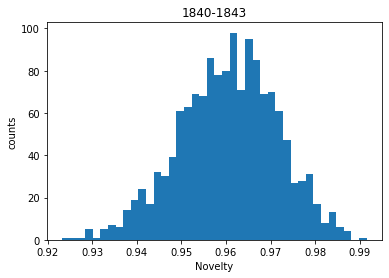

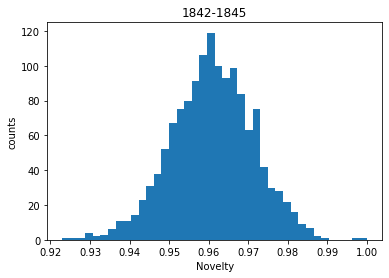

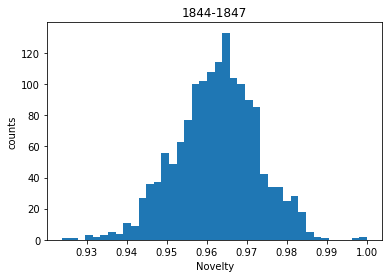

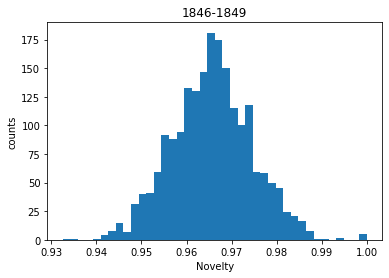

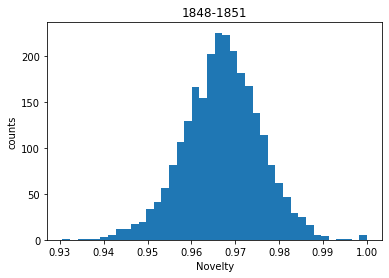

CPU times: user 717 ms, sys: 732 ms, total: 1.45 s
Wall time: 516 ms


In [4]:
%%time
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-bigram'):
        novelty = analysis.patent_novelties(window, model)
        plt.title(window)
        plt.hist(novelty, bins=40)
        plt.xlabel("Novelty")
        plt.ylabel("counts")
        plt.show()

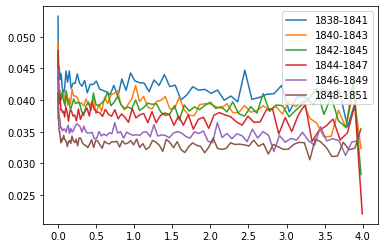

In [5]:
with DataModel(output_fp, read_only=True) as data:
    analysis = DocAnalysis(data)
    for window, model in data.iterate_window_models(model_name='default-tfidf-bigram'):
        plt.plot(*analysis.auto_correlation(window, model), label=window)
plt.legend()
plt.show()